In [1]:
import numpy as np
import pandas as pd
import os
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime

In [2]:
# Set the colour palette to coour-blind friendly
sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-colorblind')

In [3]:
print(os.getcwd())

C:\Users\geral\Repository\Coursework


In [4]:
os.chdir(r'C:\Users\geral\Repository\Coursework\Dataset')
print(os.getcwd())

C:\Users\geral\Repository\Coursework\Dataset


## Connecting to Database

In [62]:
conn = sqlite3.connect('pydatabase.db')

In [63]:
c = conn.cursor()

# Basic Setup
For this we will be taking a look at the year 2005, selecting specific periods and airports to observe any cascading effects.

In [7]:
airports = pd.read_sql_query('SELECT * FROM airports', conn)
airports

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944
...,...,...,...,...,...,...,...
3371,ZEF,Elkin Municipal,Elkin,NC,USA,36.280024,-80.786069
3372,ZER,Schuylkill Cty/Joe Zerbey,Pottsville,PA,USA,40.706449,-76.373147
3373,ZPH,Zephyrhills Municipal,Zephyrhills,FL,USA,28.228065,-82.155916
3374,ZUN,Black Rock,Zuni,NM,USA,35.083227,-108.791777


In [8]:
carriers = pd.read_sql_query('SELECT * FROM carriers', conn)
carriers

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1486,ZW,Air Wisconsin Airlines Corp
1487,ZX,Air Georgian
1488,ZX (1),Airbc Ltd.
1489,ZY,Atlantic Gulf Airlines


In [9]:
Q4_2005 = pd.read_sql_query('''SELECT * FROM '2005'
                            WHERE ArrTime <= 2359 AND DepTime <=2359''',conn)
Q4_2005
# observations : 7,140,596 

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,None,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,None,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,None,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,None,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,None,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982423,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,7,15,0,None,0,0,0,0,0,0
6982424,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,...,7,32,0,None,0,0,0,0,0,0
6982425,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,4,29,0,None,0,0,0,0,0,0
6982426,2005,12,22,4,924.0,925,1056.0,1111,DL,904,...,4,19,0,None,0,0,0,0,0,0


In [10]:
Q4_2005 = Q4_2005.drop(['CancellationCode'], axis = 1)
Q4_2005

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,867,4,23,0,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,867,6,15,0,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,867,9,18,0,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,867,11,10,0,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,867,5,10,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982423,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,1900,7,15,0,0,0,0,0,0,0
6982424,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,...,332,7,32,0,0,0,0,0,0,0
6982425,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,874,4,29,0,0,0,0,0,0,0
6982426,2005,12,22,4,924.0,925,1056.0,1111,DL,904,...,906,4,19,0,0,0,0,0,0,0


In [11]:
Q4_2005_narm = Q4_2005.dropna()
Q4_2005_narm

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,867,4,23,0,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,867,6,15,0,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,867,9,18,0,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,867,11,10,0,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,867,5,10,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6982423,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,1900,7,15,0,0,0,0,0,0,0
6982424,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,...,332,7,32,0,0,0,0,0,0,0
6982425,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,874,4,29,0,0,0,0,0,0,0
6982426,2005,12,22,4,924.0,925,1056.0,1111,DL,904,...,906,4,19,0,0,0,0,0,0,0


In [12]:
Q4_2005_narm['Dest'].unique()

array(['ORD', 'BOS', 'SAT', 'DAY', 'MSP', 'SLC', 'SFO', 'DEN', 'PDX',
       'OMA', 'PIT', 'BOI', 'IAH', 'SJC', 'BUF', 'CLE', 'ATL', 'LAX',
       'DSM', 'STL', 'SEA', 'CMH', 'SMF', 'SAN', 'SNA', 'DFW', 'IAD',
       'OKC', 'OAK', 'MCI', 'TUL', 'DCA', 'PSP', 'IND', 'MHT', 'EWR',
       'LGA', 'CLT', 'GEG', 'GRR', 'CVG', 'DTW', 'BWI', 'RNO', 'ANC',
       'GSO', 'JAC', 'ABQ', 'MIA', 'AUS', 'BDL', 'COS', 'PHL', 'ICT',
       'SJU', 'JFK', 'HNL', 'OGG', 'PBI', 'PHX', 'GUC', 'MTJ', 'KOA',
       'STT', 'MSY', 'PVD', 'ALB', 'RIC', 'BUR', 'RSW', 'TUS', 'BIL',
       'FLL', 'LAS', 'MCO', 'ONT', 'TPA', 'ABE', 'EGE', 'JAX', 'ROC',
       'ORF', 'SAV', 'MYR', 'RDU', 'SYR', 'CHS', 'BNA', 'MDT', 'BHM',
       'STX', 'ILM', 'BTV', 'PWM', 'MKE', 'AMA', 'DAL', 'ELP', 'HOU',
       'LBB', 'MAF', 'MDW', 'HRL', 'SDF', 'ISP', 'JAN', 'LIT', 'CRP',
       'FSD', 'GFK', 'FAR', 'MEM', 'BTR', 'MSN', 'VPS', 'FCA', 'SGF',
       'GRB', 'RAP', 'MBS', 'FNT', 'GPT', 'BZN', 'AZO', 'LSE', 'MOT',
       'LAN', 'MSO',

In [13]:
Q4_2005_narm.info()
# Observations : 6,992,838 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6982428 entries, 0 to 6982427
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  Diverted           int64  
 23  CarrierDelay       int64  
 24  WeatherDelay       int64  
 25  NASDelay          

## Checks
We will be observing airports which have the highest air traffic.


After running the code, we note that ATL, ORD, DFW are the 3 states with the highest number of flights.

ATL : Atlanta
ORD : Chicago
DFW : Dallas-Fort Worth

In [14]:
# checking which destination has the highest number of flights
to = Q4_2005_narm.groupby(by = ['Dest']).size().reset_index(name = 'Count')
to = to.sort_values(by = 'Count')
to

,Dest,Count
114,GST,86
8,ADK,96
70,CWA,175
161,LWB,189
215,PSE,194
...,...,...
129,IAH,207728
149,LAX,228136
77,DFW,302266
199,ORD,327943


In [15]:
checkairport = airports[airports['iata'].isin(['DFW','ORD','ATL'])]
checkairport

,iata,airport,city,state,country,lat,long
880,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944
1268,DFW,Dallas-Fort Worth International,Dallas-Fort Worth,TX,USA,32.895951,-97.037200
2531,ORD,Chicago O'Hare International,Chicago,IL,USA,41.979595,-87.904464


# Observations
With that we can begin. We note that in Q1 the month of July has the highest Arrival delay followed by December and then June. 
Likewise, in descending order, Friday, Thursday and Monday have the highest Arrival Delay. With average delays of 10.92, 10.62 and 8.35 minutes respectively. 

So, we compared the Friday of July for the top 3 airports, ATL, DFW and ORD.

In [16]:
# Creating a function to extract

def to_depdelay(df,mon,day,dest):
    '''
    Departing to a target airport
    This function is used to extract the CRSDepTime, DepDelay, Dest from the dataframe, df. Note: dest has to be in ''
    e.g mon = 1
    day = 1
    dest = 'ATL'
    '''
    x = df[(df['Month'] == mon) & 
           (df['DayofMonth'] == day) & 
           (df['Dest'] == dest)]
    x = x.loc(axis = 1)['TailNum','CRSDepTime','DepDelay']
    x = x.rename(columns={"CRSDepTime": "Scheduled_Time", "DepDelay": "Delay"})
    
    # to create a new column called cat, which will be populated by a category
    i = len(x)
    x['cat'] = np.repeat('Departure to '+dest, repeats = i)
    return x
    
def to_arrdelay(df, mon,day,dest):
    '''
    Planes arriving at a target airport
    This function is used to extract the CRSArrTime, ArrDelay, Dest from the dataframe, df. Note: dest has to be in ''
    e.g mon = 1
    day = 1
    dest = 'ATL'
    '''
    x = df[(df['Month'] == mon) & 
        (df['DayofMonth'] == day) & 
       (df['Dest'] == dest)]
    x = x.loc(axis = 1)['TailNum','CRSArrTime','ArrDelay']
    x = x.rename(columns={"CRSArrTime": "Scheduled_Time", "ArrDelay": "Delay"})
        
    # to create a new column called cat, which will be populated by a category
    i = len(x)
    x['cat'] = np.repeat('Arrival at '+dest, repeats = i)
    return x
    
def from_depdelay(df,mon,day,ori):
    '''
    Departure Delays originating FROM the target airport
    This function is used to extract the CRSDepTime, DepDelay, Origin from the dataframe, df. Note: ori has to be in ''
    e.g mon = 1
    day = 1
    ori = 'ATL'
    '''
    x = df[(df['Month'] == mon) & 
        (df['DayofMonth'] == day) & 
        (df['Origin'] == ori)]
    x = x.loc(axis = 1)['TailNum','CRSDepTime','DepDelay']
    x = x.rename(columns={"CRSDepTime": "Scheduled_Time", "DepDelay": "Delay"})
        
    # to create a new column called cat, which will be populated by a category
    i = len(x)
    x['cat'] = np.repeat('Departure from '+ori, repeats = i)
    return x
    
def from_arrdelay(df,mon,day,ori):
    '''
    Arrival Delays of planes originating from the target airport
    This function is used to extract the CRSArrTime, ArrDelay, Origin from the dataframe, df. Note: ori has to be in ''
    e.g mon = 1
    day = 1
    ori = 'ATL'
    '''
    x = df[(df['Month'] == mon) & 
        (df['DayofMonth'] == day) & 
        (df['Origin'] == ori)]
    x = x.loc(axis = 1)['TailNum','CRSArrTime','ArrDelay']
    x = x.rename(columns={"CRSArrTime": "Scheduled_Time", "ArrDelay": "Delay"})
    
    # to create a new column called cat, which will be populated by a category
    i = len(x)
    x['cat'] = np.repeat('Arrival from '+ori, repeats = i)
    return x

## ATL, Atlanta

In [37]:
toATLdep0707 = to_depdelay(Q4_2005_narm,7,7,'ATL')
toATLarr0707 = to_arrdelay(Q4_2005_narm,7,7,'ATL')
fromATLdep0707 = from_depdelay(Q4_2005_narm,7,7,'ATL')
fromATLarr0707 = from_arrdelay(Q4_2005_narm,7,7,'ATL')

In [38]:
CombinedtoATL0707 = pd.concat([toATLdep0707,toATLarr0707],axis=0)
CombinedtoATL0707

,TailNum,Scheduled_Time,Delay,cat
3499898,N811UA,1835,-4.0,Departure to ATL
3500203,N426UA,1100,-6.0,Departure to ATL
3504452,N514UA,1815,-2.0,Departure to ATL
3505396,N585UA,610,-2.0,Departure to ATL
3511968,N924UA,1315,55.0,Departure to ATL
...,...,...,...,...
4085385,N923DL,1842,33.0,Arrival at ATL
4085387,N171DZ,2245,3.0,Arrival at ATL
4085391,N238WA,1148,-13.0,Arrival at ATL
4085398,N237WA,834,-2.0,Arrival at ATL


In [19]:
CombinedfromATL0707 = pd.concat([fromATLdep0707,fromATLarr0707],axis=0)
CombinedfromATL0707

,TailNum,Scheduled_Time,Delay,cat
3496611,N843UA,730,403.0,Departure from ATL
3511996,N585UA,1008,-8.0,Departure from ATL
3513691,N828UA,1934,33.0,Departure from ATL
3517073,N426UA,1444,30.0,Departure from ATL
3518788,N309UA,811,61.0,Departure from ATL
...,...,...,...,...
4085386,N923DL,2045,35.0,Arrival from ATL
4085388,N321DL,1202,11.0,Arrival from ATL
4085394,N609DL,1510,0.0,Arrival from ATL
4085397,N304DL,1619,-8.0,Arrival from ATL


[Text(0.5, 0, 'Scheduled Time'),
 Text(0, 0.5, 'Delay'),
 Text(0.5, 1.0, 'from ATL, Fri 07/07/2005')]

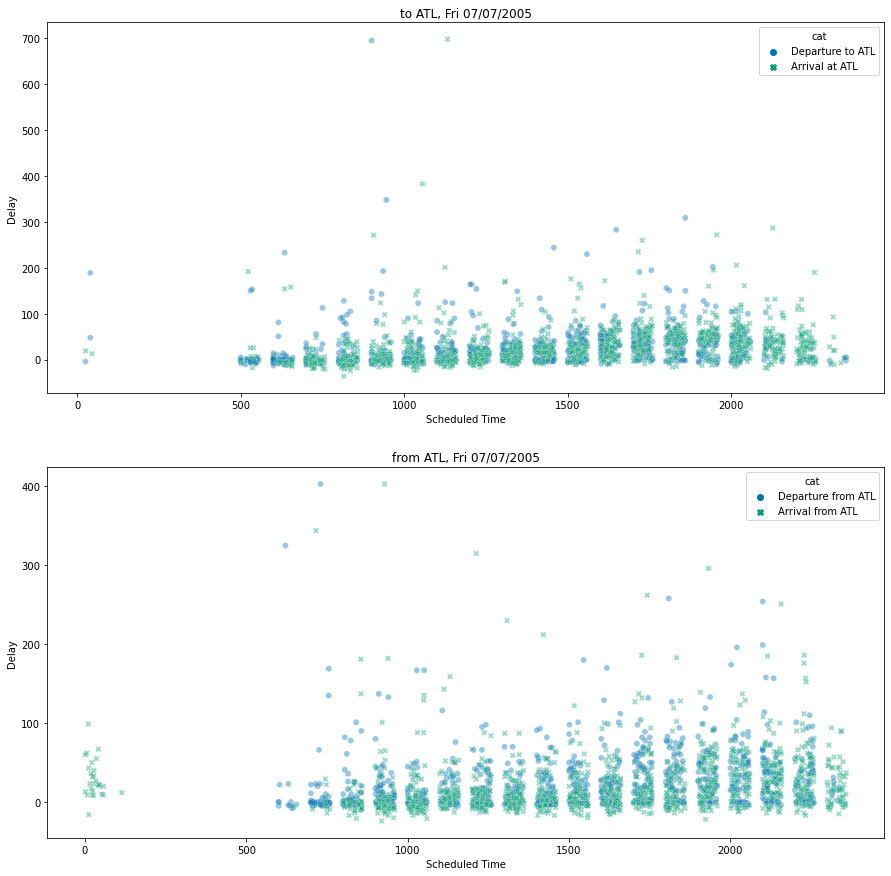

In [20]:
# CombinedtoATL0707
# CombinedfromATL0707
fig, ax = plt.subplots(2, figsize = (15,15))

sns.scatterplot(data=CombinedtoATL0707, x='Scheduled_Time', y='Delay', hue='cat',ax=ax[0], alpha=0.4, style='cat')
ax[0].set(xlabel='Scheduled Time',
       ylabel='Delay',
       title='to ATL, Fri 07/07/2005')

sns.scatterplot(data=CombinedfromATL0707, x='Scheduled_Time', y='Delay', hue='cat',ax=ax[1], alpha=0.4, style='cat')
ax[1].set(xlabel='Scheduled Time',
       ylabel='Delay',
       title='from ATL, Fri 07/07/2005')

# DFW, Dallas-Fort Worth

In [21]:
toDFWdep0707 = to_depdelay(Q4_2005_narm,7,7,'DFW')
toDFWarr0707 = to_arrdelay(Q4_2005_narm,7,7,'DFW')
fromDFWdep0707 = from_depdelay(Q4_2005_narm,7,7,'DFW')
fromDFWarr0707 = from_arrdelay(Q4_2005_narm,7,7,'DFW')

In [22]:
CombinedtoDFW0707 = pd.concat([toDFWdep0707,toDFWarr0707],axis=0)
CombinedtoDFW0707

,TailNum,Scheduled_Time,Delay,cat
3496058,N511UA,1830,-1.0,Departure to DFW
3499990,N840UA,1609,-7.0,Departure to DFW
3501201,N836UA,1100,42.0,Departure to DFW
3501665,N933UA,1216,-1.0,Departure to DFW
3501759,N849UA,1240,-7.0,Departure to DFW
...,...,...,...,...
4084825,N389DA,1633,27.0,Arrival at DFW
4084956,N3755D,1117,52.0,Arrival at DFW
4085001,N662DN,1528,22.0,Arrival at DFW
4085046,N916DN,1355,29.0,Arrival at DFW


In [23]:
CombinedfromDFW0707 = pd.concat([fromDFWdep0707,fromDFWarr0707],axis=0)
CombinedfromDFW0707

,TailNum,Scheduled_Time,Delay,cat
3496126,N538UA,925,-8.0,Departure from DFW
3496812,N426UA,2011,18.0,Departure from DFW
3499168,N849UA,1850,-5.0,Departure from DFW
3500173,N426UA,745,-4.0,Departure from DFW
3503651,N836UA,1735,-2.0,Departure from DFW
...,...,...,...,...
4085202,N389DA,1938,-9.0,Arrival from DFW
4085241,N111DN,2205,20.0,Arrival from DFW
4085247,N914DE,1121,6.0,Arrival from DFW
4085255,N601DL,1629,15.0,Arrival from DFW


[Text(0.5, 0, 'Scheduled Time'),
 Text(0, 0.5, 'Delay'),
 Text(0.5, 1.0, 'from DFW, Fri 07/07/2005')]

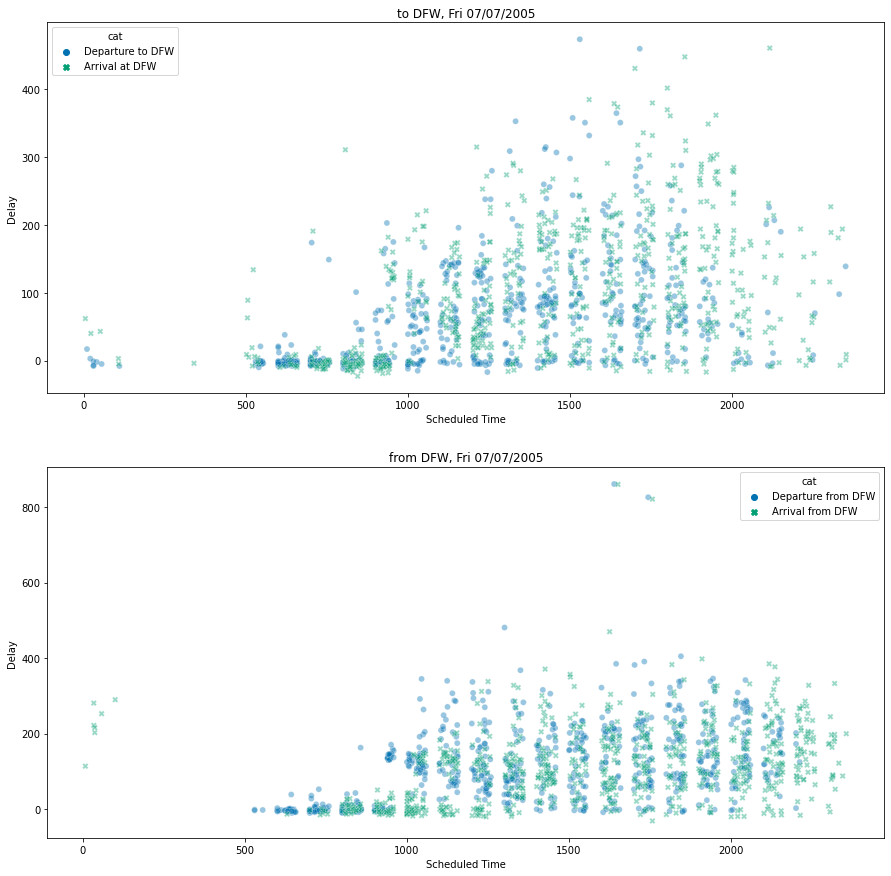

In [24]:
# CombinedtoATL0707
# CombinedfromATL0707
fig, ax = plt.subplots(2, figsize = (15,15))

sns.scatterplot(data=CombinedtoDFW0707, x='Scheduled_Time', y='Delay', hue='cat',ax=ax[0], alpha=0.4, style='cat')
ax[0].set(xlabel='Scheduled Time',
       ylabel='Delay',
       title='to DFW, Fri 07/07/2005')

sns.scatterplot(data=CombinedfromDFW0707, x='Scheduled_Time', y='Delay', hue='cat',ax=ax[1], alpha=0.4, style='cat')
ax[1].set(xlabel='Scheduled Time',
       ylabel='Delay',
       title='from DFW, Fri 07/07/2005')

# ORD, Chicago

In [25]:
toORDdep0707 = to_depdelay(Q4_2005_narm,7,7,'ORD')
toORDarr0707 = to_arrdelay(Q4_2005_narm,7,7,'ORD')
fromORDdep0707 = from_depdelay(Q4_2005_narm,7,7,'ORD')
fromORDarr0707 = from_arrdelay(Q4_2005_narm,7,7,'ORD')

In [26]:
CombinedtoORD0707 = pd.concat([toORDdep0707,toORDarr0707],axis=0)
CombinedtoORD0707

,TailNum,Scheduled_Time,Delay,cat
3496013,N582UA,600,-4.0,Departure to ORD
3496151,N516UA,1530,-5.0,Departure to ORD
3496264,N576UA,1755,-3.0,Departure to ORD
3496499,N503UA,925,-1.0,Departure to ORD
3496580,N439UA,1341,3.0,Departure to ORD
...,...,...,...,...
4084884,N301DL,2045,47.0,Arrival at ORD
4085048,N317DL,1639,172.0,Arrival at ORD
4085129,N238WA,801,-1.0,Arrival at ORD
4085169,N904DA,1214,-5.0,Arrival at ORD


In [27]:
CombinedfromORD0707 = pd.concat([fromORDdep0707,fromORDarr0707],axis=0)
CombinedfromORD0707

,TailNum,Scheduled_Time,Delay,cat
3495982,N582UA,810,19.0,Departure from ORD
3496176,N531UA,1805,0.0,Departure from ORD
3496206,N539UA,1705,-1.0,Departure from ORD
3496233,N924UA,1935,11.0,Departure from ORD
3496295,N576UA,2005,0.0,Departure from ORD
...,...,...,...,...
4084855,N320DL,2313,49.0,Arrival from ORD
4084860,N946DL,1455,26.0,Arrival from ORD
4085015,N909DA,1001,-1.0,Arrival from ORD
4085325,N961DL,2200,-9.0,Arrival from ORD


[Text(0.5, 0, 'Scheduled Time'),
 Text(0, 0.5, 'Delay'),
 Text(0.5, 1.0, 'from ORD, Fri 07/07/2005')]

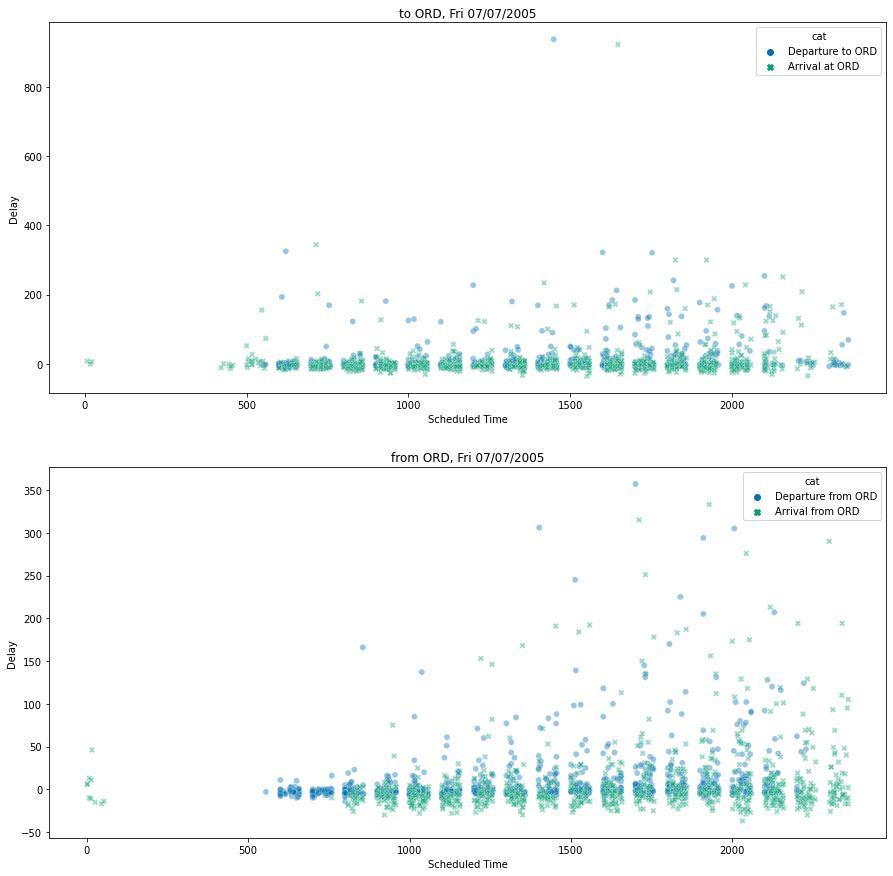

In [28]:
# CombinedtoATL0707
# CombinedfromATL0707
fig, ax = plt.subplots(2, figsize = (15,15))

sns.scatterplot(data=CombinedtoORD0707, x='Scheduled_Time', y='Delay', hue='cat',ax=ax[0], alpha=0.4, style='cat')
ax[0].set(xlabel='Scheduled Time',
       ylabel='Delay',
       title='to ORD, Fri 07/07/2005')

sns.scatterplot(data=CombinedfromORD0707, x='Scheduled_Time', y='Delay', hue='cat',ax=ax[1], alpha=0.4, style='cat')
ax[1].set(xlabel='Scheduled Time',
       ylabel='Delay',
       title='from ORD, Fri 07/07/2005')

# Further Investigation
We did some testings. Our objective now is to compare if the mean avg delay of the previous period has any correlation. And to see the number of flights in each period.

We reuse the function in q1 to categorise each observation into their timebin. 

In [29]:
def recode_timebin(ArrTime):
    '''
    This function serves to sort the arrival time into timebins. 
    
    timebins: in a day, 24 hours is broken down into 24 periods. 
    '''
    if (ArrTime < 100) & (ArrTime >= 0):
        return '0000-0100'
    elif (ArrTime < 200) & (ArrTime >= 100):
        return '0100-0200'
    elif (ArrTime < 300) & (ArrTime >= 200):
        return '0200-0300'
    elif (ArrTime < 400) & (ArrTime >= 300):
        return '0300-0400'
    elif (ArrTime < 500) & (ArrTime >= 400):
        return '0400-0500'
    elif (ArrTime < 600) & (ArrTime >= 500):
        return '0500-0600'
    elif (ArrTime < 700) & (ArrTime >= 600):
        return '0600-0700'
    elif (ArrTime < 800) & (ArrTime >= 700):
        return '0700-0800'
    elif (ArrTime < 900) & (ArrTime >= 800):
        return '0800-0900'
    elif (ArrTime < 1000) & (ArrTime >= 900):
        return '0900-1000'
    elif (ArrTime < 1100) & (ArrTime >= 1000):
        return '1000-1100'
    elif (ArrTime < 1200) & (ArrTime >= 1100):
        return '1100-1200'
    elif (ArrTime < 1300) & (ArrTime >= 1200):
        return '1200-1300'
    elif (ArrTime < 1400) & (ArrTime >= 1300):
        return '1300-1400'
    elif (ArrTime < 1500) & (ArrTime >= 1400):
        return '1400-1500'
    elif (ArrTime < 1600) & (ArrTime >= 1500):
        return '1500-1600'
    elif (ArrTime < 1700) & (ArrTime >= 1600):
        return '1600-1700'
    elif (ArrTime < 1800) & (ArrTime >= 1700):
        return '1700-1800'
    elif (ArrTime < 1900) & (ArrTime >= 1800):
        return '1800-1900'
    elif (ArrTime < 2000) & (ArrTime >= 1900):
        return '1900-2000'
    elif (ArrTime < 2100) & (ArrTime >= 2000):
        return '2000-2100'
    elif (ArrTime < 2200) & (ArrTime >= 2100):
        return '2100-2200'
    elif (ArrTime < 2300) & (ArrTime >= 2200):
        return '2200-2300'
    elif (ArrTime < 2359) & (ArrTime >= 2300):
        return '2300-2359'
    else: 
        return 'NA'

# ATL 07/07/05
Our focus will be on ATL on 07/07/2005. We first look at toATL then we compare fromATL
## toATL

In [74]:
# CombinedtoATL0707
# CombinedfromATL0707

# Creating a timebin column and populate using the above function
checktoATL = CombinedtoATL0707.copy()
checktoATL['Timebin'] = checktoATL['Scheduled_Time'].apply(recode_timebin)
checktoATL = checktoATL[checktoATL['cat']=='Arrival at ATL']

# checking the unique values
checktoATL['Timebin'].unique()

array(['2300-2359', '1300-1400', '2100-2200', '0900-1000', '1600-1700',
       '0800-0900', '2200-2300', '1800-1900', '1400-1500', '1100-1200',
       '1000-1100', '0700-0800', '1500-1600', '1900-2000', '2000-2100',
       '1700-1800', '0000-0100', '1200-1300', '0600-0700', '0500-0600'],
      dtype=object)

In [75]:
checktoATL

,TailNum,Scheduled_Time,Delay,cat,Timebin
3499898,N811UA,2335,-7.0,Arrival at ATL,2300-2359
3500203,N426UA,1353,29.0,Arrival at ATL,1300-1400
3504452,N514UA,2119,-5.0,Arrival at ATL,2100-2200
3505396,N585UA,905,2.0,Arrival at ATL,0900-1000
3511968,N924UA,1636,55.0,Arrival at ATL,1600-1700
...,...,...,...,...,...
4085385,N923DL,1842,33.0,Arrival at ATL,1800-1900
4085387,N171DZ,2245,3.0,Arrival at ATL,2200-2300
4085391,N238WA,1148,-13.0,Arrival at ATL,1100-1200
4085398,N237WA,834,-2.0,Arrival at ATL,0800-0900


In [76]:
checktoATL = checktoATL.groupby('Timebin')
check = (checktoATL.agg({'Timebin': 'count',
                                "Delay": "mean"})
                          .rename(columns={'Timebin':'count_toATL',
                                           'Delay':'avg_toATL'})).reset_index()
check

,Timebin,count_toATL,avg_toATL
0,0000-0100,2,16.000000
1,0500-0600,11,20.181818
2,0600-0700,17,12.705882
3,0700-0800,52,-1.711538
4,0800-0900,77,1.311688
5,0900-1000,60,17.083333
6,1000-1100,62,22.951613
7,1100-1200,66,25.257576
8,1200-1300,76,13.500000
9,1300-1400,77,22.480519


In [77]:
# CombinedtoATL0707
# CombinedfromATL0707

# Creating a timebin column and populate using the above function
checkfromATL = CombinedfromATL0707.copy()
checkfromATL['Timebin'] = checkfromATL['Scheduled_Time'].apply(recode_timebin)
checkfromATL = checkfromATL[checkfromATL['cat']=='Arrival from ATL']

# checking the unique values
checkfromATL['Timebin'].unique()

array(['0900-1000', '1100-1200', '2000-2100', '1500-1600', '1000-1100',
       '2100-2200', '0800-0900', '1700-1800', '1300-1400', '1600-1700',
       '1900-2000', '2300-2359', '1200-1300', '1400-1500', '1800-1900',
       '2200-2300', '0000-0100', '0700-0800', '0600-0700', 'NA',
       '0100-0200'], dtype=object)

In [78]:
checkfromATL

,TailNum,Scheduled_Time,Delay,cat,Timebin
3496611,N843UA,928,403.0,Arrival from ATL,0900-1000
3511996,N585UA,1114,-8.0,Arrival from ATL,1100-1200
3513691,N828UA,2045,13.0,Arrival from ATL,2000-2100
3517073,N426UA,1559,9.0,Arrival from ATL,1500-1600
3518788,N309UA,930,53.0,Arrival from ATL,0900-1000
...,...,...,...,...,...
4085386,N923DL,2045,35.0,Arrival from ATL,2000-2100
4085388,N321DL,1202,11.0,Arrival from ATL,1200-1300
4085394,N609DL,1510,0.0,Arrival from ATL,1500-1600
4085397,N304DL,1619,-8.0,Arrival from ATL,1600-1700


In [79]:
checkfromATL = checkfromATL.groupby('Timebin')
check2 = (checkfromATL.agg({'Timebin': 'count',
                                "Delay": "mean"})
                          .rename(columns={'Timebin':'count_fromATL',
                                           'Delay':'avg_fromATL'})).reset_index()
check2

,Timebin,count_fromATL,avg_fromATL
0,0000-0100,27,29.888889
1,0100-0200,1,12.000000
2,0600-0700,1,-5.000000
3,0700-0800,10,35.700000
4,0800-0900,38,7.000000
5,0900-1000,70,12.400000
6,1000-1100,81,7.814815
7,1100-1200,67,14.507463
8,1200-1300,76,15.013158
9,1300-1400,79,12.683544


In [80]:
check = check.iloc[1:20,]
check

,Timebin,count_toATL,avg_toATL
1,0500-0600,11,20.181818
2,0600-0700,17,12.705882
3,0700-0800,52,-1.711538
4,0800-0900,77,1.311688
5,0900-1000,60,17.083333
6,1000-1100,62,22.951613
7,1100-1200,66,25.257576
8,1200-1300,76,13.500000
9,1300-1400,77,22.480519
10,1400-1500,62,22.096774


In [81]:
check2 = check2.iloc[2:20,]
check2

,Timebin,count_fromATL,avg_fromATL
2,0600-0700,1,-5.000000
3,0700-0800,10,35.700000
4,0800-0900,38,7.000000
5,0900-1000,70,12.400000
6,1000-1100,81,7.814815
7,1100-1200,67,14.507463
8,1200-1300,76,15.013158
9,1300-1400,79,12.683544
10,1400-1500,65,14.384615
11,1500-1600,73,13.602740


In [82]:
df_merged = pd.merge(check, check2, on='Timebin', how='outer')
df_merged

,Timebin,count_toATL,avg_toATL,count_fromATL,avg_fromATL
0,0500-0600,11,20.181818,NaN,NaN
1,0600-0700,17,12.705882,1.0,-5.000000
2,0700-0800,52,-1.711538,10.0,35.700000
3,0800-0900,77,1.311688,38.0,7.000000
4,0900-1000,60,17.083333,70.0,12.400000
5,1000-1100,62,22.951613,81.0,7.814815
6,1100-1200,66,25.257576,67.0,14.507463
7,1200-1300,76,13.500000,76.0,15.013158
8,1300-1400,77,22.480519,79.0,12.683544
9,1400-1500,62,22.096774,65.0,14.384615


### Visualisation
We want to create a plot which focus on ATL 07/07/2005

In [85]:
# CombinedtoATL0707
# CombinedfromATL0707

toplot = CombinedtoATL0707.copy()
toplot['Timebin'] = toplot['Scheduled_Time'].apply(recode_timebin)
toplot = toplot[(toplot.cat == 'Arrival at ATL') & (toplot.Timebin != '0000-0100') & (toplot.Timebin != '0100-0200')]
toplot

,TailNum,Scheduled_Time,Delay,cat,Timebin
3499898,N811UA,2335,-7.0,Arrival at ATL,2300-2359
3500203,N426UA,1353,29.0,Arrival at ATL,1300-1400
3504452,N514UA,2119,-5.0,Arrival at ATL,2100-2200
3505396,N585UA,905,2.0,Arrival at ATL,0900-1000
3511968,N924UA,1636,55.0,Arrival at ATL,1600-1700
...,...,...,...,...,...
4085385,N923DL,1842,33.0,Arrival at ATL,1800-1900
4085387,N171DZ,2245,3.0,Arrival at ATL,2200-2300
4085391,N238WA,1148,-13.0,Arrival at ATL,1100-1200
4085398,N237WA,834,-2.0,Arrival at ATL,0800-0900


In [87]:
# CombinedtoATL0707
# CombinedfromATL0707

fromplot = CombinedfromATL0707.copy()
fromplot['Timebin'] = fromplot['Scheduled_Time'].apply(recode_timebin)
fromplot = fromplot[(fromplot.cat == 'Arrival from ATL') & (fromplot.Timebin != '0000-0100') & (fromplot.Timebin != '0100-0200')]
fromplot

,TailNum,Scheduled_Time,Delay,cat,Timebin
3496611,N843UA,928,403.0,Arrival from ATL,0900-1000
3511996,N585UA,1114,-8.0,Arrival from ATL,1100-1200
3513691,N828UA,2045,13.0,Arrival from ATL,2000-2100
3517073,N426UA,1559,9.0,Arrival from ATL,1500-1600
3518788,N309UA,930,53.0,Arrival from ATL,0900-1000
...,...,...,...,...,...
4085386,N923DL,2045,35.0,Arrival from ATL,2000-2100
4085388,N321DL,1202,11.0,Arrival from ATL,1200-1300
4085394,N609DL,1510,0.0,Arrival from ATL,1500-1600
4085397,N304DL,1619,-8.0,Arrival from ATL,1600-1700


In [118]:
mergedplot = pd.concat([toplot,fromplot])
mergedplot = mergedplot[mergedplot['Timebin']!='NA'].sort_values(by='Scheduled_Time')
mergedplot

,TailNum,Scheduled_Time,Delay,cat,Timebin
3859525,N184AT,500,-8.0,Arrival at ATL,0500-0600
3859532,N240AT,507,-9.0,Arrival at ATL,0500-0600
4084000,N3734B,519,3.0,Arrival at ATL,0500-0600
4085094,N675DL,523,192.0,Arrival at ATL,0500-0600
4083851,N662DN,529,26.0,Arrival at ATL,0500-0600
...,...,...,...,...,...
3859224,N967AT,2355,32.0,Arrival from ATL,2300-2359
4084807,N945DL,2356,-2.0,Arrival from ATL,2300-2359
3830493,N904EV,2356,-3.0,Arrival from ATL,2300-2359
4083967,N674DL,2357,-5.0,Arrival from ATL,2300-2359


In [120]:
mergedplot2 = mergedplot.copy()
mergedplot2 = mergedplot.groupby(by = ['Timebin','cat']).size().reset_index().rename(columns={0:'Count'})
mergedplot2 = mergedplot2[mergedplot2['Timebin']!='NA']
mergedplot2

,Timebin,cat,Count
0,0500-0600,Arrival at ATL,11
1,0600-0700,Arrival at ATL,17
2,0600-0700,Arrival from ATL,1
3,0700-0800,Arrival at ATL,52
4,0700-0800,Arrival from ATL,10
5,0800-0900,Arrival at ATL,77
6,0800-0900,Arrival from ATL,38
7,0900-1000,Arrival at ATL,60
8,0900-1000,Arrival from ATL,70
9,1000-1100,Arrival at ATL,62


In [121]:
mergedplot2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Timebin  37 non-null     object
 1   cat      37 non-null     object
 2   Count    37 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


[Text(0.5, 0, 'Timebin'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Count of Flights')]

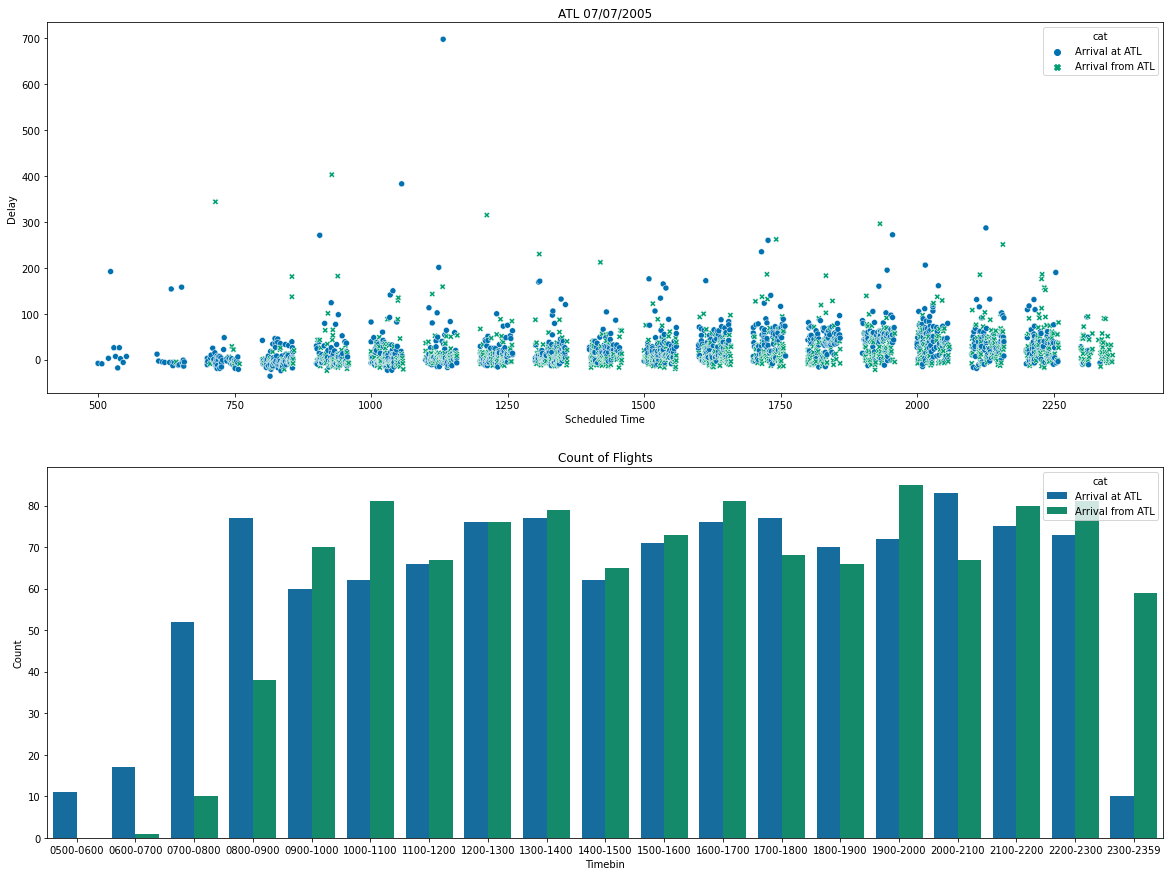

In [124]:
# plot
fig, ax = plt.subplots(2, figsize = (20,15))

# Delay vs Scheduled_Time
sns.scatterplot(data = mergedplot, x = 'Scheduled_Time', y = 'Delay', ax = ax[0], hue = 'cat', style = 'cat')
ax[0].set(xlabel='Scheduled Time',
          ylabel='Delay',
          title='ATL 07/07/2005')

# Count
sns.barplot(data = mergedplot2, x = 'Timebin', y = 'Count', ax = ax[1], hue = 'cat')
ax[1].set(xlabel='Timebin',
          ylabel='Count',
          title='Count of Flights')

### Disconnecting from the Database

In [61]:
conn.close()